# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

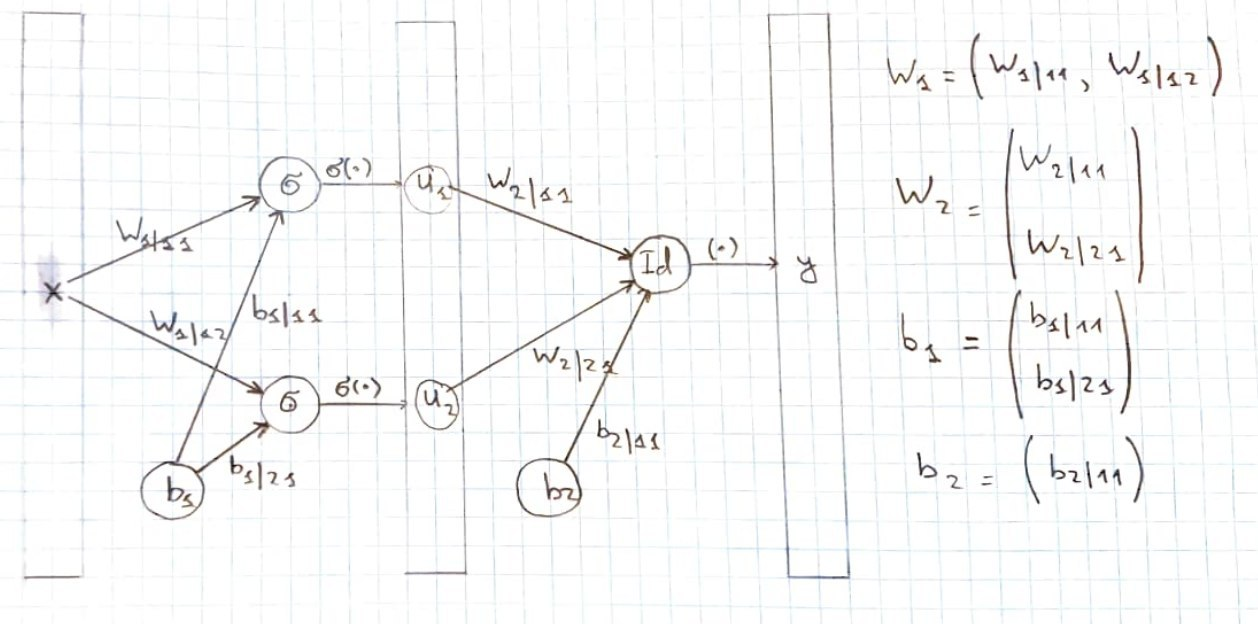

У данной нейросети 7 обучаемых параметров: 2 матрицы весов по два элемента каждой, 2 вектора сдвига с 2 и 1 элементом в 1-м и 2-м слое.

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{1}{n}\sum_{j=1}^n \frac{\partial\: \big(Y_j - \widehat{y}(X_j)\big)^2}{\partial \widehat{y}(X_i)} = \frac{2}{n} \big(\widehat{y}(X_i) - Y_i)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \frac{\partial \sum_{j=1}^2 w_{2j}u_j(X_i) + b_2}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \frac{\partial \sum_{j=1}^2 w_{2j}u_j(X_i) + b_2}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \frac{\partial \sum_{j=1}^2 w_{2j}u_j(X_i) + b_2}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h(X_i)} = \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)
} \frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \frac{\partial\:\frac{1}{1 + e^{-x}}}{\partial x} = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1 - \sigma(x))$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \frac{\partial\: \sigma(w_{1h}X_i + b_{1h})}{\partial w_{1h}} = \frac{\partial\: \sigma(w_{1h}X_i + b_{1h})}{\partial\: w_{1h}X_i + b_{1h}}\frac{\partial\: w_{1h}X_i + b_{1h}}{\partial w_{1h}} = \sigma(w_{1h}X_i + b_{1h})(1 - \sigma(w_{1h}X_i + b_{1h}))X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \frac{\partial\: \sigma(w_{1h}X_i + b_{1h})}{\partial b_{1h}} = \frac{\partial\: \sigma(w_{1h}X_i + b_{1h})}{\partial\: w_{1h}X_i + b_{1h}}\frac{\partial\: w_{1h}X_i + b_{1h}}{\partial b_{1h}} = \sigma(w_{1h}X_i + b_{1h})(1 - \sigma(w_{1h}X_i + b_{1h}))$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

В случае если обучающая выборка очень большая нужно применять алгоритм стохастического градиентного спуска (SGD). Он заключается в разбиении данных на батчи, затем на батче считается градиент, после чего параметры обновляются, затем так происходит для каждого батча, после чего эпоха обучения заканчивается, и данные заново разбиваются на батчи.

$$\theta_t = \theta_{t-1} - \eta\frac{1}{B}\sum_{b=1}^B \nabla L(\widehat{y}(X_{i_b}), \: Y_i) $$
где $\{X_{i_1}, X_{i_2}, ..., X_{i_B}\}$ - батч, $\theta$ - вектор обучамых параметров, L - метрика, $\eta$ - константа обучения

**Вывод:**
Таким образом мы видим, что при расчёте градиентов мы можем использовать ранеее полученные результаты, двигаясь от выходного слоя, но при этом чем больше слоёв, тем больше раз мы умножаем градиенты в первых слоях.
Если же данных много то их необходимо разбивать на батчи и обновлять параметры после подсчёта градиента на каждом батче.

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Подключим необходимые библиотеки

In [4]:
from IPython.display import clear_output

sns.set(palette='Set2')

import torch
from torch import nn

print(torch.__version__)

1.12.1


/home/danilach/anaconda3/envs/mipt-stats/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [5]:
sample_size = int(1e5)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.power(X, 3)

assert y.shape == (sample_size, 1)  # Дописана 1, без неё не работает

Обучите нейросеть на этих данных. Используйте код с занятия.

Разделим данные на обучающую и тестовую выборку

In [6]:
arr = np.hstack((X, y))  # Соеденим два массива, чтобы соответсвие не исчезло

train, test = train_test_split(arr, test_size=0.2)

train, test = train.T, test.T

x_train = train[0]
y_train = train[1]
x_test = test[0]
y_test = test[1]

Создадим torch-тензоры и поменяем размерность для работы с моделью

In [7]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

x_new = x_train.reshape(-1, 1)
y_new = y_train.reshape(-1, 1)

Определим функцию - инициализатор весов и сдвигов. Это необходимо для корректного обучения, чтобы значения не менялись вместе и нейроны внутри слоя отличались друг от друга.

In [11]:
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        n = m.in_features
        y = 10.0 / np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(10)

Соберём модули в последовательность

In [16]:
model = nn.Sequential(
    # Создадим нейросеть с двумя слоями и 10 нейронами в скрытом слое
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1))
model.apply(weights_init_uniform_rule)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

Определим функцию отрисовки процесса обучения

In [23]:
def show_progress(x, y, y_pred, loss, title='y(x) = x^3'):
    '''
    x - тензор признаков
    y - тензор таргета
    y_pred - предсказание
    loss - лосс
    title - название графика
    '''
    y_pred = y_pred.detach()
    loss = loss.item()
    clear_output(wait=True)

    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75, s=5, label='y=x^3')
    plt.scatter(x,
                y_pred,
                color='orange',
                linewidth=1,
                s=5,
                label='model prediction')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title(title)
    plt.legend()
    plt.show()

    print(f"MSE = {loss:.3f}")

Установим стохастический градиентный спуск в качестве алгоритма оптимизации и MSE в качестве оптимизируемой функции. Learning rate выберем исходя из скорости обучения

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.06)
optim_func = nn.MSELoss()

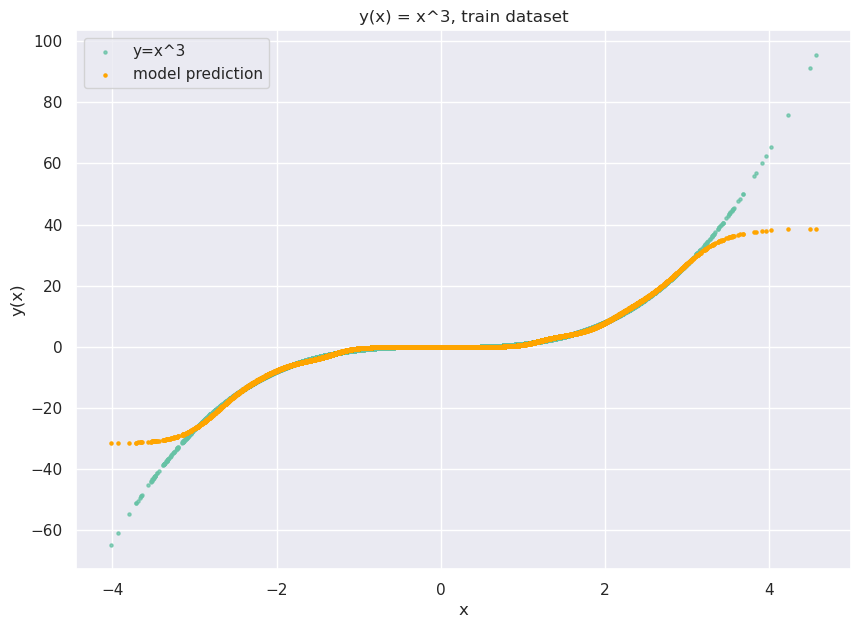

MSE = 0.314


In [24]:
# Количество итераций
num_iter = 2500

for i in range(num_iter):

    y_pred = model(x_new)
    loss = optim_func(y_pred, y_new)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i + 1) % 60 == 0:
        show_progress(x_train, y_train, y_pred, loss,
                      'y(x) = x^3, train dataset')

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

Преобразуем тестовую выборку

In [25]:
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)
x_new_test = x_test.reshape(-1, 1)
y_new_test = y_test.reshape(-1, 1)

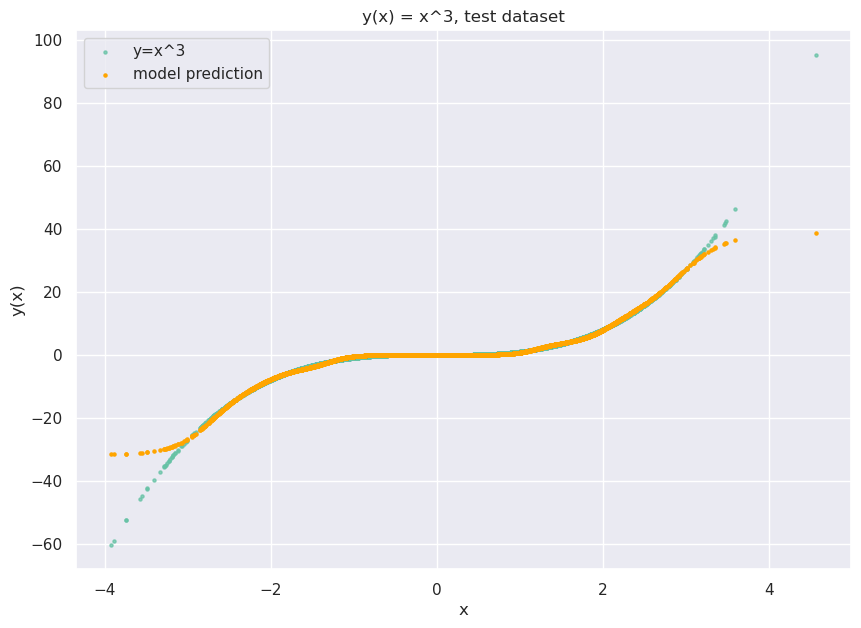

MSE = 0.409


In [50]:
prediction = model(x_new_test)
loss = optim_func(prediction, y_new_test)
show_progress(x_new_test, y_new_test, prediction, loss,
              'y(x) = x^3, test dataset')

**Вывод:**

Модель, представляющая из себя двухслойную нейронную сеть с 10 нейронами сигмоидной функции активации, неплохо аппроксимирует кубическую функцию. Хуже аппроксимируются края, в которых число точек мало, т.к. точки распределены нормально вдоль оси х. Тем не менее эксперимент подтверждает теорему Цыбенко, и мы можем аппроксимировать функции таким образом.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [27]:
import random  # Для перемешивания вектора в SGD

In [28]:
class NeuralNetwork:
    def __init__(self):
        '''
        Инициализация модели нейронной сети с двумя нейронами
        '''
        # Все веса и сдвиги - случайные значения
        self.w1 = np.random.rand(2)
        self.b1 = np.random.rand(2)
        self.w2 = np.random.rand(2)
        self.b2 = np.random.rand(1)

    def epoch_function(self, X, Y, eta):
        '''
        1 эпоха обучений
        X -- numpy-матрица объект-признак;
        Y -- numpy-вектор значений целевого признака;
        eta -- шаг градиентного спуска.
        '''
        # Backward pass значения
        u11 = X * self.w1[0] + self.b1[0]
        u12 = X * self.w1[1] + self.b1[1]
        u21 = 1 / (1 + np.exp(-u11))
        u22 = 1 / (1 + np.exp(-u12))
        sz = len(X)

        lll = (u21 * self.w2[0] + u22 * self.w2[1] + self.b2 - Y) * (2 / sz)
        w1w = self.w2[0] * lll * u21 * (1 - u21)
        eeq = self.w2[1] * lll * u22 * (1 - u22)

        #MSE градиент
        MSEw21 = np.sum((u21 * lll).numpy())
        MSEw22 = np.sum((u22 * lll).numpy())
        MSEb2 = np.sum((lll).numpy())
        MSEb12 = np.sum(eeq.numpy())
        MSEb11 = np.sum(w1w.numpy())
        MSEw12 = np.sum((eeq * X).numpy())
        MSEw11 = np.sum((w1w * X).numpy())

        # Обновление весов и сдвигов
        self.w1[0] = self.w1[0] - eta * MSEw11
        self.w1[1] = self.w1[1] - (eta * MSEw12)
        self.b1[0] = self.b1[0] - (eta * MSEb11)
        self.b1[1] = self.b1[1] - (eta * MSEb12)
        self.w2[0] = self.w2[0] - (eta * MSEw21)
        self.w2[1] = self.w2[1] - (eta * MSEw22)
        self.b2 = self.b2 - (eta * MSEb2)

    def fit(self, X, Y, epoch_cnt=10000, eta=0.001, SGD=False, b_size=4096):
        '''
        Функция обучения
        X -- numpy-матрица объект-признак;
        Y -- numpy-вектор значений целевого признака;
        epoch_cnt -- число эпох;
        eta -- шаг градиентного спуска;
        SGD -- стохастический градиентный спуск;
        b_size -- размер батча.
        '''
        for i in range(epoch_cnt):

            if SGD:
                xs = np.hstack((X.T, Y.T))
                random.shuffle(xs)

                for i in range(0, len(xs), b_size):
                    batch = xs[i:i + b_size]
                    x_b = batch.T[0]
                    y_b = batch.T[1]
                    self.epoch_function(x_b, y_b, eta)

            else:
                self.epoch_function(X, Y, eta)

        return self

    def predict(self, X):
        '''
        Функция предсказывания;
        X -- numpy-матрица объект-признак.
        '''
        s11 = X * self.w1[0] + self.b1[0]
        s12 = X * self.w1[1] + self.b1[1]
        s21 = 1 / (1 + np.exp(-s11))
        s22 = 1 / (1 + np.exp(-s12))
        ans = s21 * self.w2[0] + s22 * self.w2[1] + self.b2
        return ans

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Создадим 2-ю модель и обучим её

In [29]:
model2 = NeuralNetwork()
model2.fit(x_train, y_train, epoch_cnt=30000, eta=0.02, SGD=False)

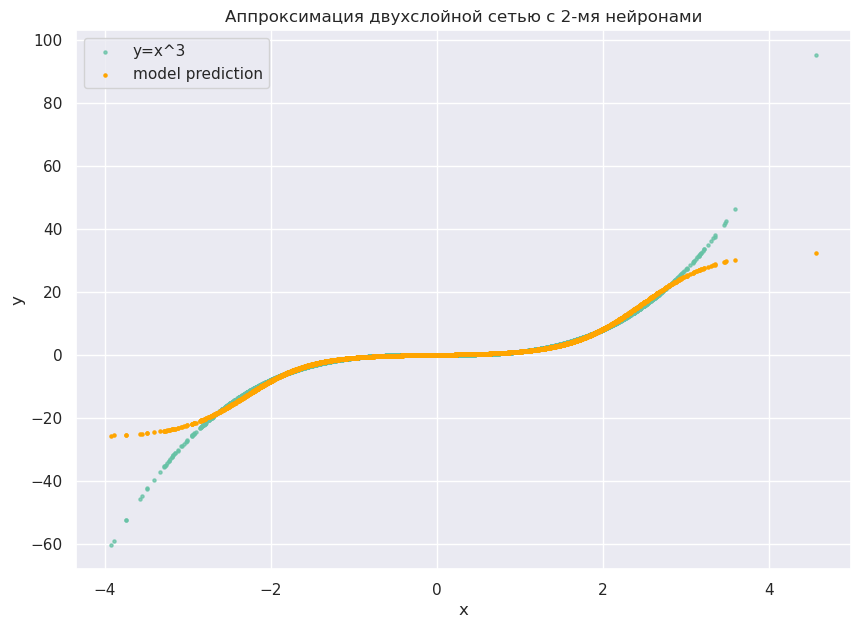

MSE: 0.545983561657295


In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(x_test, y_test, alpha=0.75, s=5, label='y=x^3')
plt.scatter(x_test,
            model2.predict(x_test),
            color='orange',
            linewidth=1,
            s=5,
            label='model prediction')
plt.title('Аппроксимация двухслойной сетью с 2-мя нейронами')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(
    f"MSE: {np.mean((model2.predict(x_train).numpy() - y_train.numpy())**2)}")

Вывод, для несложной функции, число нейронов не оказывате большого влияния на качество результата. 10 нейронная сеть и 2-ч нейронная сети дают примерно одинаковые результаты

Теперь создадим модель линейной регрессии, импортируем библиотеки

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
lin_reg = LinearRegression(fit_intercept=True)  # объявляем модель
lin_reg.fit(np.column_stack((np.ones((len(x_train), 1)), x_train)),
            np.array(y_train))

lin_reg.coef_

array([0.        , 2.98688943])

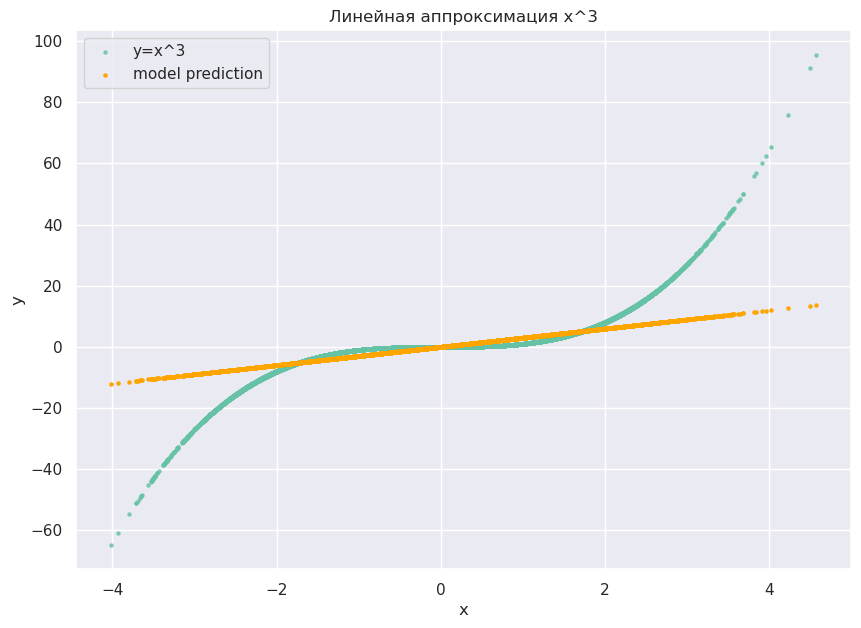

MSE: 5.930408000946045


In [33]:
plt.figure(figsize=(10, 7))
y_lin = x_train * lin_reg.coef_[1] + lin_reg.coef_[0]
plt.scatter(x_train, y_train, alpha=0.75, s=5, label='y=x^3')

plt.scatter(x_train,
            y_lin,
            color='orange',
            linewidth=1,
            s=5,
            label='model prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная аппроксимация x^3')
plt.legend()

plt.show()

print(
    f"MSE: {np.mean((lin_reg.coef_[1] * x_train.numpy() +lin_reg.coef_[0] - y_train.numpy())**2)}"
)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

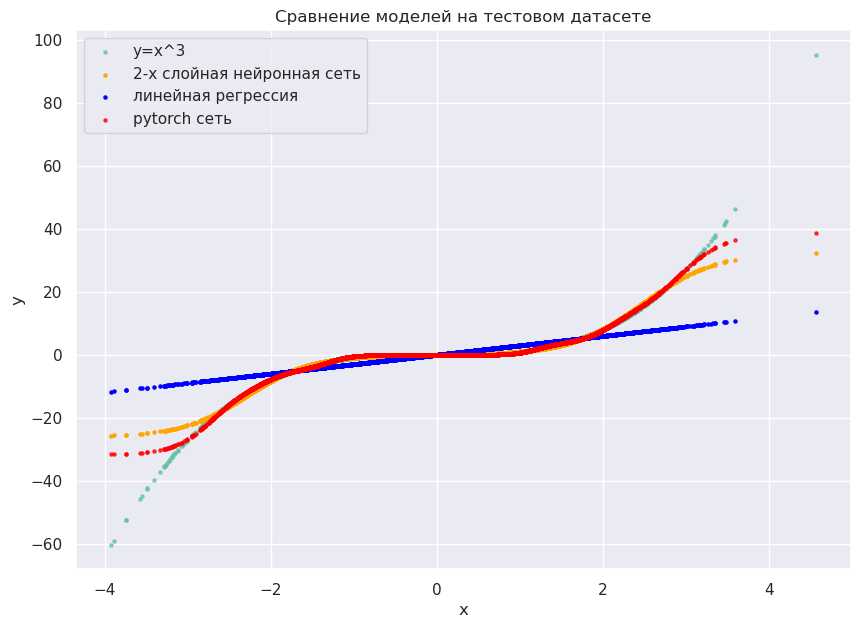

MSE 2х слойной сети: 0.676891
MSE линейной регрессии: 6.367449
MSE pytorch сети: 0.408740


In [60]:
plt.figure(figsize=(10, 7))

plt.scatter(x_test, y_test, alpha=0.75, s=5, label='y=x^3')
plt.scatter(x_test,
            model2.predict(x_test),
            color='orange',
            linewidth=1,
            s=5,
            label='2-х слойная нейронная сеть')

y_lin = x_test * lin_reg.coef_[1] + lin_reg.coef_[0]
plt.scatter(x_test,
            y_lin,
            color='blue',
            linewidth=1,
            s=5,
            label='линейная регрессия')

plt.scatter(x_test,
            prediction.detach(),
            color='red',
            alpha=0.75,
            s=5,
            label='pytorch сеть')

plt.title('Сравнение моделей на тестовом датасете')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print(
    f"MSE 2х слойной сети: {np.mean((model2.predict(x_test).numpy() - y_test.numpy())**2):.6f}"
)
print(
    f"MSE линейной регрессии: {np.mean((y_lin.numpy() - y_test.numpy())**2):.6f}"
)
print(
    f"MSE pytorch сети: {np.mean((prediction.detach().numpy() - y_new_test.numpy())**2):.6f}"
)

Линейная регрессия, в случае нелинейных функций даёт крайне плохие результаты, отличие pytorch и самодельной сети невелики, уичтываю что у pytorch сети в 5 раз больше параметров

Повторите вычисления для другой нелинейной функции $y(x)$.

Придумаем интересную функцию, которая раскроет в полной мере 10-ти - нейронную двуслойную нейросеть. Будем называть её "тригонометрической".

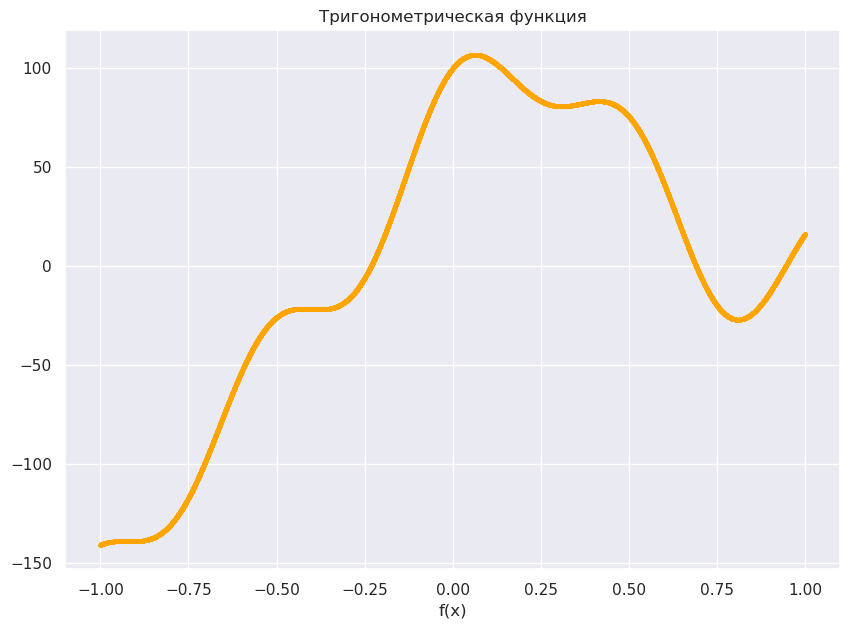

In [61]:
x_2 = np.linspace(-1, 1, 10000)
y_2 = (np.sin(x_2) + np.sin(x_2 * 6) * 0.2 + np.cos(x_2 * 3) * 0.8 +
       np.cos(x_2 * 12) * 0.2) * 100

plt.figure(figsize=(10, 7))

plt.scatter(x_2, y_2, color='orange', linewidth=1, s=5)
plt.xlabel('x')
plt.xlabel('f(x)')
plt.title('Тригонометрическая функция')

plt.show()

Обработаем данные

In [72]:
arr = np.vstack((x_2, y_2))

train, test = train_test_split(arr.T, test_size=0.2)

train, test = train.T, test.T

x_2_train = train[0]
y_2_train = train[1]
x_2_test = test[0]
y_2_test = test[1]

In [73]:
x_2_train = torch.FloatTensor(x_2_train)
y_2_train = torch.FloatTensor(y_2_train)

x_2_new = x_2_train.reshape(-1, 1)
y_2_new = y_2_train.reshape(-1, 1)

Создадим модель двуслойной неросети

In [234]:
model3 = nn.Sequential(
    # Создадим нейросеть с двумя слоями и 10 нейронами в скрытом слое
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1))
model3.apply(weights_init_uniform_rule)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [253]:
optimizer2 = torch.optim.SGD(model3.parameters(), lr=0.005)
optim_func2 = nn.MSELoss()

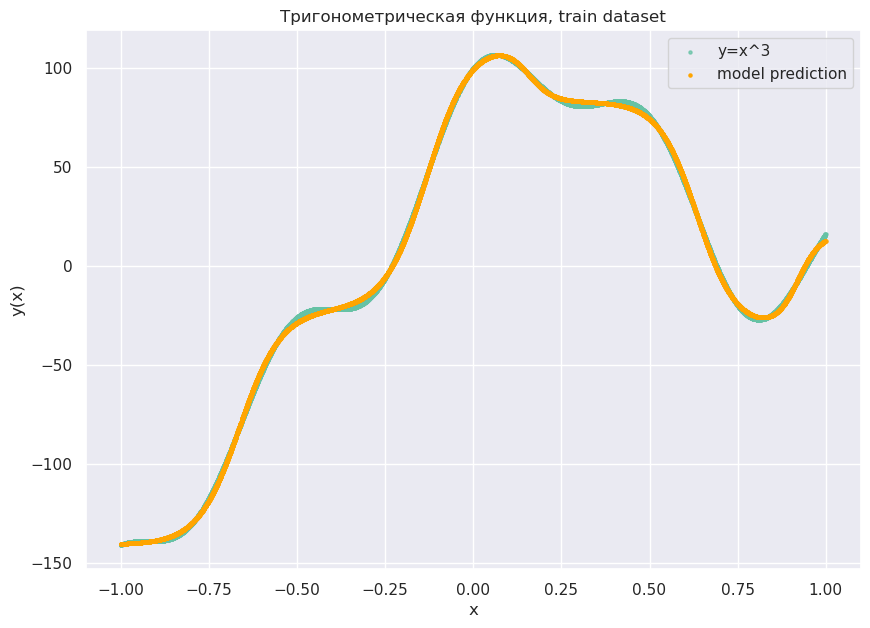

MSE = 2.063


In [254]:
# Количество итераций
num_iter = 5000

for i in range(num_iter):

    y_2_pred = model3(x_2_new)
    loss2 = optim_func(y_2_pred, y_2_new)
    loss2.backward()
    optimizer2.step()
    optimizer2.zero_grad()
    if (i + 1) % 60 == 0:
        show_progress(x_2_train, y_2_train, y_2_pred, loss2,
                      'Тригонометрическая функция, train dataset')

Обучим линейную регрессию

In [148]:
lin_reg2 = LinearRegression(fit_intercept=True)  # объявляем модель
lin_reg2.fit(np.column_stack((np.ones((len(x_2_train), 1)), x_2_train)),
             np.array(y_2_train))

LinearRegression()

Обучим нейронную сеть с двумя нейронами

In [149]:
model4 = NeuralNetwork()
model4.fit(x_2_train, y_2_train, epoch_cnt=60000, eta=0.006, SGD=False)

Сравним все модели на тестовом датасете

In [150]:
x_2_test = torch.FloatTensor(x_2_test)
y_2_test = torch.FloatTensor(y_2_test)

x_2_new_test = x_2_test.reshape(-1, 1)
y_2_new_test = y_2_test.reshape(-1, 1)

Предсказание pytorch модели

In [251]:
y_2_pred_test = model3(x_2_new_test)

Сравним модели

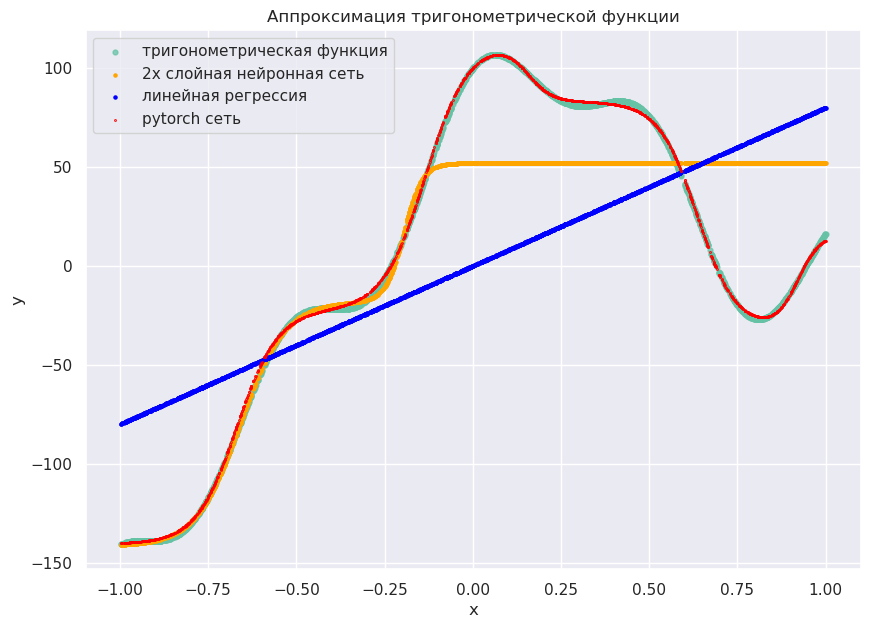

In [252]:
plt.figure(figsize=(10, 7))

plt.scatter(x_2_test,
            y_2_test,
            alpha=0.75,
            s=12,
            label='тригонометрическая функция')
plt.scatter(x_2_test,
            model4.predict(x_2_test),
            color='orange',
            linewidth=1,
            s=5,
            label='2х слойная нейронная сеть')

y_2_lin = x_2_test * lin_reg2.coef_[1] + lin_reg2.coef_[0]
plt.scatter(x_2_test,
            y_2_lin,
            color='blue',
            linewidth=1,
            s=5,
            label='линейная регрессия')

plt.scatter(x_2_test,
            y_2_pred_test.detach().numpy(),
            color='red',
            linewidth=1.5,
            s=0.3,
            label='pytorch сеть')

plt.title(
    'Сравнение моделей на тестовом датасете (тригонометрическая функция)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Выведем MSE

In [256]:
print(
    f"MSE 2х слойной сети: {np.mean((model4.predict(x_2_test).numpy() - y_2_test.numpy())**2):.6f}"
)
print(
    f"MSE линейной регрессии: {np.mean((y_2_lin.numpy() - y_2_test.numpy())**2):.6f}"
)
print(
    f"MSE pytorch сети: {np.mean((y_2_pred_test.detach().numpy() - y_2_new_test.numpy())**2):.6f}"
)

MSE 2х слойной сети: 1170.490637
MSE линейной регрессии: 3612.535645
MSE pytorch сети: 2.893225


**Вывод:**
    Таким образом мы видим, что наилучших результатов достигает нейронная сеть с 10-ю нейронами, затем идёт нейронная сеть с 2-мя нейронами, а линейная регрессия в случае нелинейных функций даёт худший результат. При этом чем сложнее функция, тем больше необходимо нейронов в сети для её аппроксимации. Мы видим, что 2-х нейронной сети не хватает "изгибов чтобы приблизить сложную функцию, и она способна аппроксимировать только небольшую её часть. Таким образом, чем больше у функции деталей, тем больше нейронов нужно брать для сети.